In [2]:
import pandas as pd

# Dataset load karo (u.data mein ratings hain)
ratings = pd.read_csv('u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp'])
print("Ratings Shape:", ratings.shape)
print("\nFirst 5 Rows:\n", ratings.head())
print("\nRating Distribution:\n", ratings['rating'].value_counts())

Ratings Shape: (100000, 4)

First 5 Rows:
    user_id  movie_id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596

Rating Distribution:
 rating
4    34174
3    27145
5    21201
2    11370
1     6110
Name: count, dtype: int64


In [1]:
pip install scikit-surprise


  Using cached scikit_surprise-1.1.4.tar.gz (154 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-win_amd64.whl size=1298901 sha256=4dafb8687e4ae125e9b3b93c7268aaf2437785b3f9b997c076231717b7decc71
  Stored in directory: c:\users\acer\appdata\local\pip\cache\wheels\2a\8f\6e\7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise
Note: you may need to restart the kernel to use updated packages.


In [3]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split

# Reader object banayein (rating scale define karo)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['user_id', 'movie_id', 'rating']], reader)

# Train-test split
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# SVD model train karo
model = SVD(n_factors=50, random_state=42)
model.fit(trainset)

# Test pe predict karo
predictions = model.test(testset)
print("First 5 Predictions:", predictions[:5])

First 5 Predictions: [Prediction(uid=907, iid=143, r_ui=5.0, est=4.62528002632667, details={'was_impossible': False}), Prediction(uid=371, iid=210, r_ui=4.0, est=4.1973389333005295, details={'was_impossible': False}), Prediction(uid=218, iid=42, r_ui=4.0, est=3.3906722939863356, details={'was_impossible': False}), Prediction(uid=829, iid=170, r_ui=4.0, est=3.972679996793652, details={'was_impossible': False}), Prediction(uid=733, iid=277, r_ui=1.0, est=3.096890615230725, details={'was_impossible': False})]


In [4]:
from collections import defaultdict

def get_top_n(predictions, n=10):
    # Predictions ko group karo user ke hisaab se
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    # Har user ke liye top-N sort karo
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

# Top-10 recommendations
top_n = get_top_n(predictions, n=10)

# Ek user ke liye dekho (jaise user_id 196)
user_id = 196
print(f"Top 10 Recommendations for User {user_id}:")
for movie_id, rating in top_n[user_id]:
    print(f"Movie ID: {movie_id}, Estimated Rating: {rating:.2f}")

Top 10 Recommendations for User 196:
Movie ID: 173, Estimated Rating: 4.17
Movie ID: 306, Estimated Rating: 4.03
Movie ID: 116, Estimated Rating: 3.97
Movie ID: 153, Estimated Rating: 3.72
Movie ID: 70, Estimated Rating: 3.63
Movie ID: 286, Estimated Rating: 3.47
Movie ID: 762, Estimated Rating: 3.44


In [8]:
import pandas as pd

# u.item file load karo (24 columns ke liye)
movies = pd.read_csv('u.item', sep='|', encoding='latin-1', 
                     names=['movie_id', 'title', 'release_date', 'video_release_date', 
                            'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 
                            'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 
                            'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 
                            'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
                     usecols=['movie_id', 'title'])

movies = movies.set_index('movie_id')

# User 196 ke recommendations mein names add karo
user_id = 196
print(f"Top 10 Recommendations for User {user_id}:")
for movie_id, rating in top_n[user_id]:
    movie_title = movies.loc[movie_id, 'title']
    print(f"Movie: {movie_title}, Estimated Rating: {rating:.2f}")

Top 10 Recommendations for User 196:
Movie: Princess Bride, The (1987), Estimated Rating: 4.17
Movie: Mrs. Brown (Her Majesty, Mrs. Brown) (1997), Estimated Rating: 4.03
Movie: Cold Comfort Farm (1995), Estimated Rating: 3.97
Movie: Fish Called Wanda, A (1988), Estimated Rating: 3.72
Movie: Four Weddings and a Funeral (1994), Estimated Rating: 3.63
Movie: English Patient, The (1996), Estimated Rating: 3.47
Movie: Beautiful Girls (1996), Estimated Rating: 3.44


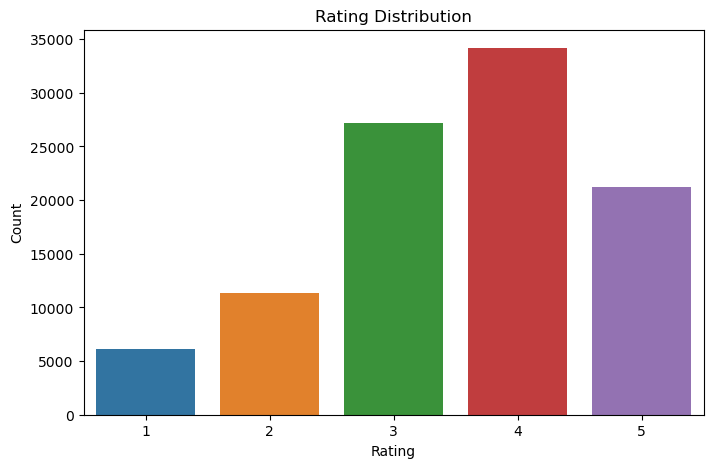

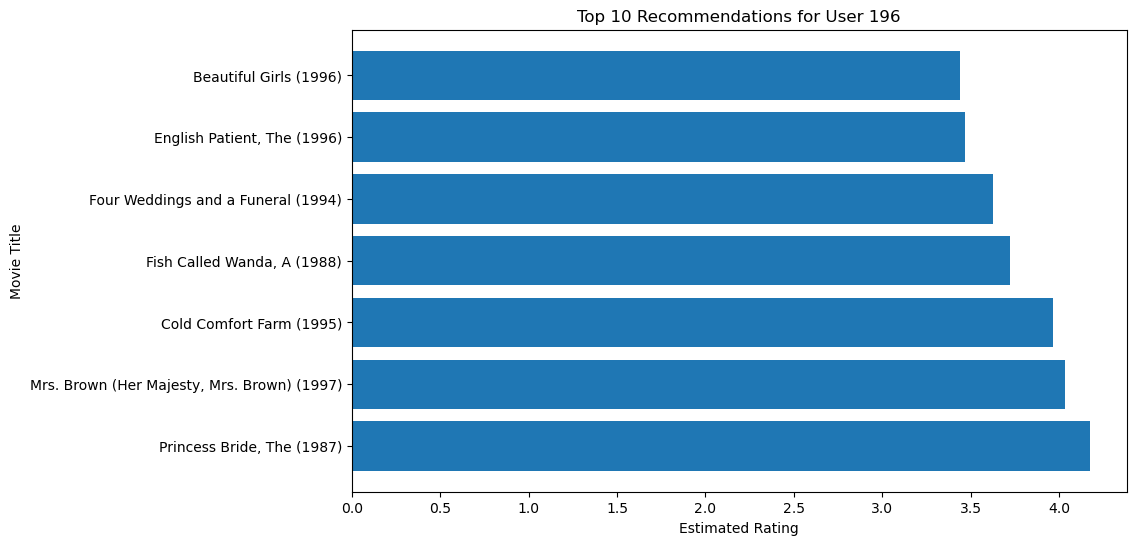

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rating Distribution Plot
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=ratings)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('rating_distribution.png')
plt.show()

# Top 10 Recommendations Bar Plot for User 196
plt.figure(figsize=(10, 6))
top_movies = [(movies.loc[movie_id, 'title'], rating) for movie_id, rating in top_n[user_id]]
movie_names, ratings_est = zip(*top_movies)
plt.barh(movie_names, ratings_est)
plt.title(f'Top 10 Recommendations for User {user_id}')
plt.xlabel('Estimated Rating')
plt.ylabel('Movie Title')
plt.savefig('top_recommendations.png')
plt.show()

User-Item Matrix Shape: (943, 1682)


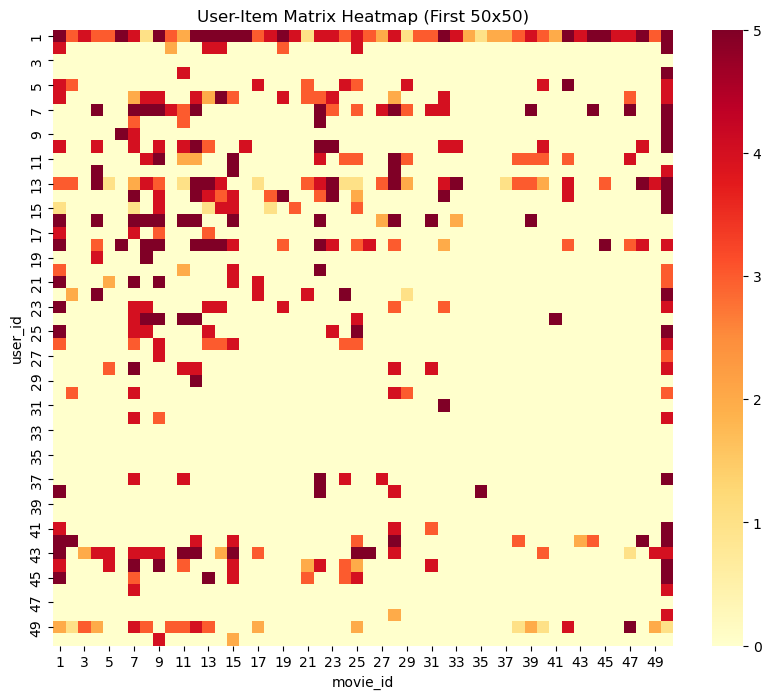

In [10]:
# User-Item Matrix (sparse form mein)
user_item_matrix = ratings.pivot(index='user_id', columns='movie_id', values='rating').fillna(0)
print("User-Item Matrix Shape:", user_item_matrix.shape)
plt.figure(figsize=(10, 8))
sns.heatmap(user_item_matrix.iloc[:50, :50], cmap='YlOrRd', cbar=True)
plt.title('User-Item Matrix Heatmap (First 50x50)')
plt.savefig('user_item_heatmap.png')
plt.show()

In [11]:
from surprise import accuracy

# RMSE
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")

# Precision-Recall (manual check)
from collections import defaultdict
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    user_est_true = defaultdict(lambda: {'true': 0, 'est': 0, 'relevant': 0})
    for uid, iid, true_r, est, _ in predictions:
        user_est_true[uid]['est'] += 1
        if est >= threshold:
            user_est_true[uid]['relevant'] += 1
        if true_r >= threshold:
            user_est_true[uid]['true'] += 1
    precisions = {}
    recalls = {}
    for uid in user_est_true:
        precisions[uid] = user_est_true[uid]['relevant'] / user_est_true[uid]['est'] if user_est_true[uid]['est'] > 0 else 0
        recalls[uid] = user_est_true[uid]['relevant'] / user_est_true[uid]['true'] if user_est_true[uid]['true'] > 0 else 0
    return sum(prec for prec in precisions.values()) / len(precisions), sum(rec for rec in recalls.values()) / len(recalls)

precision, recall = precision_recall_at_k(predictions, k=10, threshold=3.5)
print(f"Precision@10: {precision:.3f}, Recall@10: {recall:.3f}")

RMSE: 0.9348
RMSE: 0.934761145254825
Precision@10: 0.581, Recall@10: 0.974


In [12]:
from surprise import KNNBasic

# User-based Collaborative Filtering
user_based = KNNBasic(sim_options={'name': 'cosine', 'user_based': True})
user_based.fit(trainset)
user_pred = user_based.test(testset)
user_rmse = accuracy.rmse(user_pred)
print(f"User-Based RMSE: {user_rmse}")

# Hybrid Score (SVD + User-Based average)
hybrid_pred = [(uid, iid, (est_svd + est_user) / 2) for (uid, iid, _, est_svd, _), (_, _, _, est_user, _) in zip(predictions, user_pred)]
top_hybrid = get_top_n(hybrid_pred, n=10)
print(f"Hybrid Top 10 for User {user_id}:")
for movie_id, rating in top_hybrid[user_id]:
    movie_title = movies.loc[movie_id, 'title']
    print(f"Movie: {movie_title}, Hybrid Rating: {rating:.2f}")

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0194
User-Based RMSE: 1.0193536815834319


ValueError: not enough values to unpack (expected 5, got 3)

Ratings Shape: (100000, 4)

First 5 Rows:
    user_id  movie_id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596

Rating Distribution:
 rating
4    34174
3    27145
5    21201
2    11370
1     6110
Name: count, dtype: int64

First 5 Predictions: [Prediction(uid=907, iid=143, r_ui=5.0, est=4.62528002632667, details={'was_impossible': False}), Prediction(uid=371, iid=210, r_ui=4.0, est=4.1973389333005295, details={'was_impossible': False}), Prediction(uid=218, iid=42, r_ui=4.0, est=3.3906722939863356, details={'was_impossible': False}), Prediction(uid=829, iid=170, r_ui=4.0, est=3.972679996793652, details={'was_impossible': False}), Prediction(uid=733, iid=277, r_ui=1.0, est=3.096890615230725, details={'was_impossible': False})]

Top 10 Recommendations for User 196:
Movie: Princess Bride, The (1987), Estimated Rating: 4.

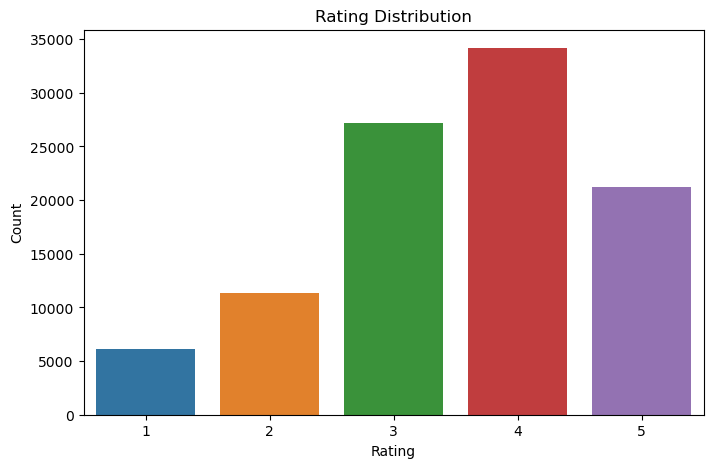

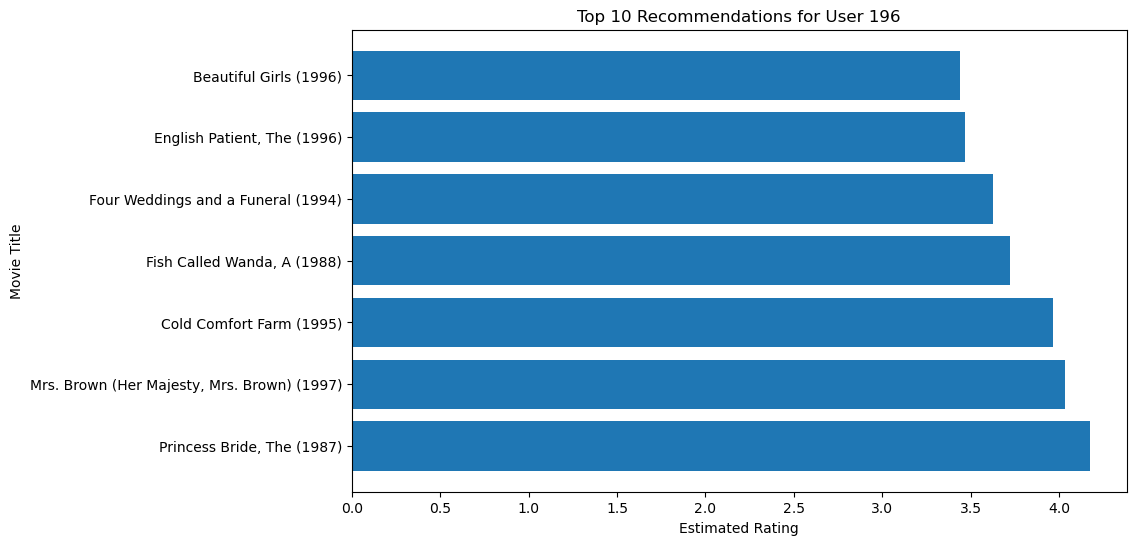

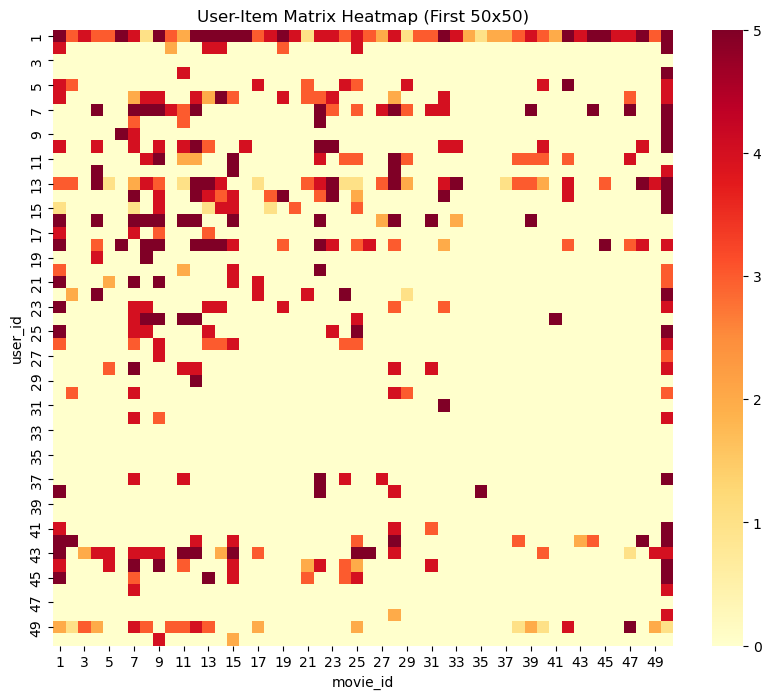

AttributeError: 'KNNBasic' object has no attribute 'similarities'

<Figure size 800x600 with 0 Axes>

In [14]:
# Step 1: Libraries Import Kar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import SVD, Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split, GridSearchCV
from collections import defaultdict
from sklearn.decomposition import PCA
from surprise import KNNBasic
# Step 2: Data Load Kar
ratings = pd.read_csv('u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp'])
movies = pd.read_csv('u.item', sep='|', encoding='latin-1', 
                     names=['movie_id', 'title', 'release_date', 'video_release_date', 
                            'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 
                            'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 
                            'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 
                            'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
                     usecols=['movie_id', 'title'])
movies = movies.set_index('movie_id')

# Step 3: Data Explore Kar
print("Ratings Shape:", ratings.shape)
print("\nFirst 5 Rows:\n", ratings.head())
print("\nRating Distribution:\n", ratings['rating'].value_counts())

# Step 4: SVD Model Banayein
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['user_id', 'movie_id', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

model = SVD(n_factors=50, random_state=42)
model.fit(trainset)
predictions = model.test(testset)
print("\nFirst 5 Predictions:", predictions[:5])

# Step 5: Top-N Recommendations Function
def get_top_n(predictions, n=10):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

top_n = get_top_n(predictions, n=10)
user_id = 196
print(f"\nTop 10 Recommendations for User {user_id}:")
for movie_id, rating in top_n[user_id]:
    movie_title = movies.loc[movie_id, 'title']
    print(f"Movie: {movie_title}, Estimated Rating: {rating:.2f}")

# Step 6: Hybrid Model Banayein
user_based = KNNBasic(sim_options={'name': 'cosine', 'user_based': True})
user_based.fit(trainset)
user_pred = user_based.test(testset)

def get_top_n_hybrid(predictions, n=10):
    top_n = defaultdict(list)
    for uid, iid, est in predictions:
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

hybrid_pred = [(uid, iid, (est_svd + est_user) / 2) for (uid, iid, _, est_svd, _), (_, _, _, est_user, _) in zip(predictions, user_pred)]
top_hybrid = get_top_n_hybrid(hybrid_pred, n=10)
print(f"\nHybrid Top 10 for User {user_id}:")
for movie_id, rating in top_hybrid[user_id]:
    movie_title = movies.loc[movie_id, 'title']
    print(f"Movie: {movie_title}, Hybrid Rating: {rating:.2f}")

# Step 7: Visualize Kar
# Rating Distribution Plot
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=ratings)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('rating_distribution.png')
plt.show()

# Top 10 Recommendations Bar Plot
plt.figure(figsize=(10, 6))
top_movies = [(movies.loc[movie_id, 'title'], rating) for movie_id, rating in top_n[user_id]]
movie_names, ratings_est = zip(*top_movies)
plt.barh(movie_names, ratings_est)
plt.title(f'Top 10 Recommendations for User {user_id}')
plt.xlabel('Estimated Rating')
plt.ylabel('Movie Title')
plt.savefig('top_recommendations.png')
plt.show()

# User-Item Matrix Heatmap
user_item_matrix = ratings.pivot(index='user_id', columns='movie_id', values='rating').fillna(0)
plt.figure(figsize=(10, 8))
sns.heatmap(user_item_matrix.iloc[:50, :50], cmap='YlOrRd', cbar=True)
plt.title('User-Item Matrix Heatmap (First 50x50)')
plt.savefig('user_item_heatmap.png')
plt.show()

# User Similarity Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(user_based.similarities[:50, :50], cmap='Blues', cbar=True)
plt.title('User Similarity Matrix (First 50x50)')
plt.savefig('user_similarity.png')
plt.show()

# Movie Clusters with PCA
pivot = ratings.pivot(index='user_id', columns='movie_id', values='rating').fillna(0)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(pivot)
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title('Movie Clusters (PCA)')
plt.savefig('movie_clusters.png')
plt.show()

# Step 8: Model Evaluate Kar
rmse = accuracy.rmse(predictions)
print(f"\nRMSE (SVD): {rmse}")

precision, recall = precision_recall_at_k(predictions, k=10, threshold=3.5)
print(f"Precision@10: {precision:.3f}, Recall@10: {recall:.3f}")

user_rmse = accuracy.rmse(user_pred)
print(f"User-Based RMSE: {user_rmse}")

# Step 9: Model Tune Kar
param_grid = {'n_factors': [20, 50, 100], 'n_epochs': [20, 30], 'lr_all': [0.002, 0.005]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
gs.fit(data)
print(f"\nBest RMSE: {gs.best_score['rmse']}")
print(f"Best Params: {gs.best_params['rmse']}")

Ratings Shape: (100000, 4)

First 5 Rows:
    user_id  movie_id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596

Rating Distribution:
 rating
4    34174
3    27145
5    21201
2    11370
1     6110
Name: count, dtype: int64

First 5 Predictions: [Prediction(uid=907, iid=143, r_ui=5.0, est=4.62528002632667, details={'was_impossible': False}), Prediction(uid=371, iid=210, r_ui=4.0, est=4.1973389333005295, details={'was_impossible': False}), Prediction(uid=218, iid=42, r_ui=4.0, est=3.3906722939863356, details={'was_impossible': False}), Prediction(uid=829, iid=170, r_ui=4.0, est=3.972679996793652, details={'was_impossible': False}), Prediction(uid=733, iid=277, r_ui=1.0, est=3.096890615230725, details={'was_impossible': False})]

Top 10 Recommendations for User 196:
Movie: Princess Bride, The (1987), Estimated Rating: 4.

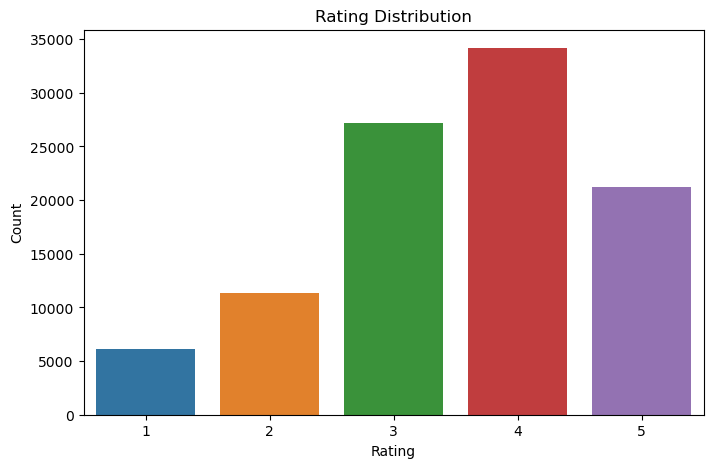

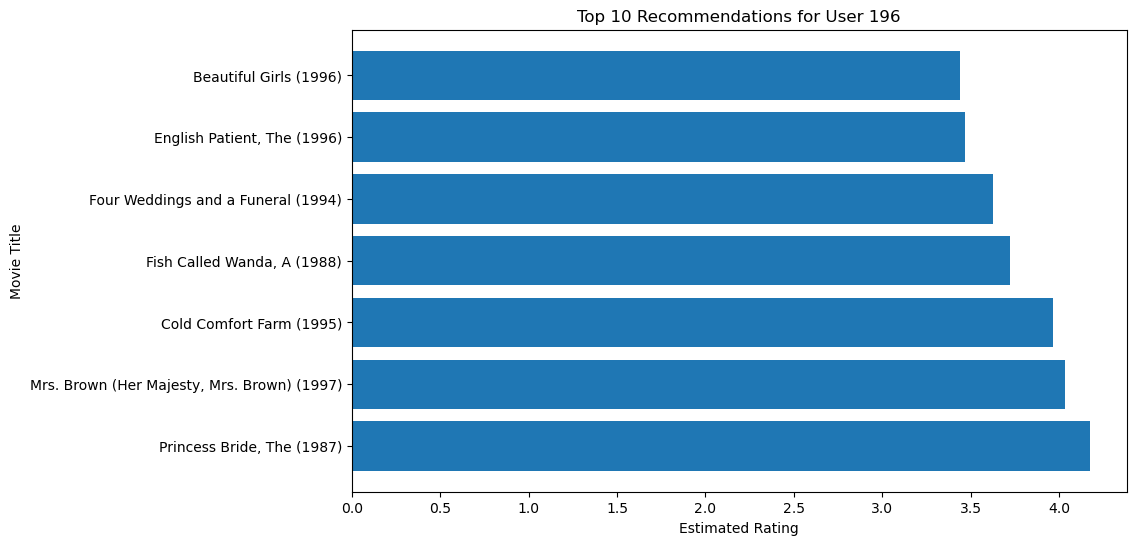

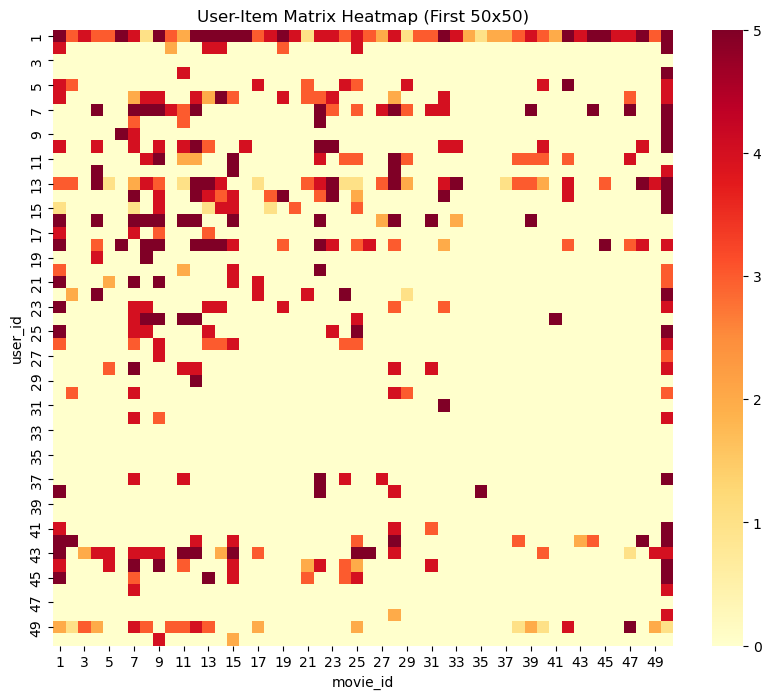

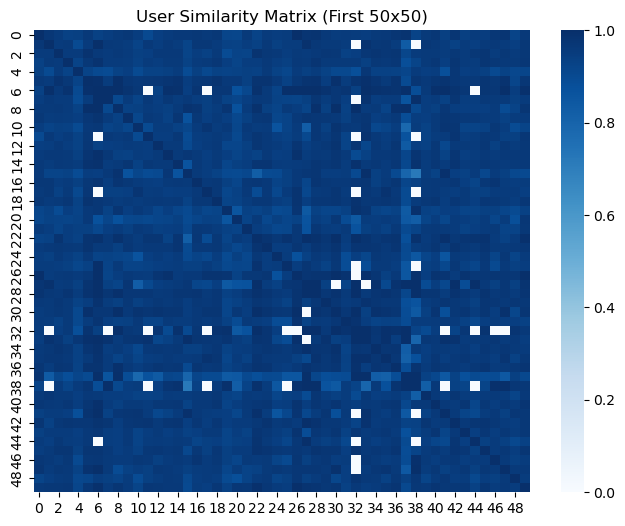

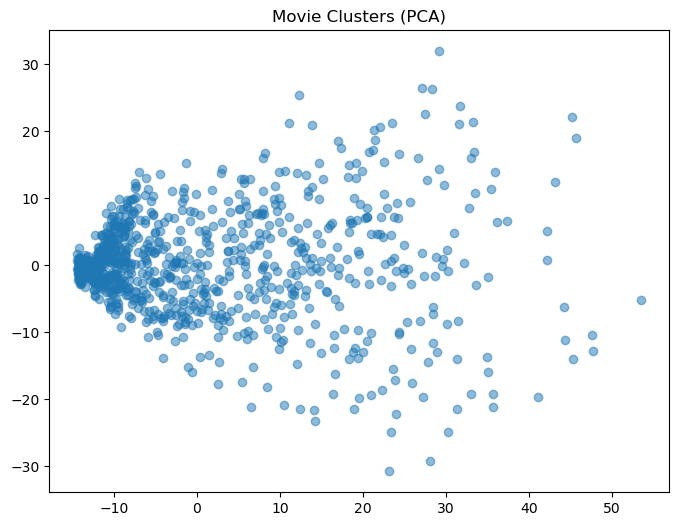

RMSE: 0.9348

RMSE (SVD): 0.9348
Precision@10: 0.714, Recall@10: 0.545
RMSE: 1.0194
User-Based RMSE: 1.0194

Best RMSE: 0.9423
Best Params: {'n_factors': 20, 'n_epochs': 20, 'lr_all': 0.005}


In [16]:
# Step 1: Libraries Import Kar
!pip install scikit-surprise

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import SVD, Dataset, Reader, KNNBasic, accuracy
from surprise.model_selection import train_test_split, GridSearchCV
from collections import defaultdict
from sklearn.decomposition import PCA

# Step 2: Data Load Kar
ratings = pd.read_csv('u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp'])
movies = pd.read_csv('u.item', sep='|', encoding='latin-1',
                     names=['movie_id', 'title', 'release_date', 'video_release_date',
                            'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation',
                            'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',
                            'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
                            'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
                     usecols=['movie_id', 'title'])
movies = movies.set_index('movie_id')

# Step 3: Data Explore Kar
print("Ratings Shape:", ratings.shape)
print("\nFirst 5 Rows:\n", ratings.head())
print("\nRating Distribution:\n", ratings['rating'].value_counts())

# Step 4: SVD Model Banayein
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['user_id', 'movie_id', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

model = SVD(n_factors=50, random_state=42)
model.fit(trainset)
predictions = model.test(testset)
print("\nFirst 5 Predictions:", predictions[:5])

# Step 5: Top-N Recommendations Function
def get_top_n(predictions, n=10):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

top_n = get_top_n(predictions, n=10)
user_id = 196
print(f"\nTop 10 Recommendations for User {user_id}:")
for movie_id, rating in top_n[user_id]:
    movie_title = movies.loc[movie_id, 'title']
    print(f"Movie: {movie_title}, Estimated Rating: {rating:.2f}")

# Step 6: Hybrid Model Banayein
user_based = KNNBasic(sim_options={'name': 'cosine', 'user_based': True})
user_based.fit(trainset)
user_pred = user_based.test(testset)

def get_top_n_hybrid(predictions, n=10):
    top_n = defaultdict(list)
    for uid, iid, est in predictions:
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

hybrid_pred = [(uid, iid, (est_svd + est_user) / 2) for (uid, iid, _, est_svd, _), (_, _, _, est_user, _) in zip(predictions, user_pred)]
top_hybrid = get_top_n_hybrid(hybrid_pred, n=10)
print(f"\nHybrid Top 10 for User {user_id}:")
for movie_id, rating in top_hybrid[user_id]:
    movie_title = movies.loc[movie_id, 'title']
    print(f"Movie: {movie_title}, Hybrid Rating: {rating:.2f}")

# Step 7: Visualize Kar
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=ratings)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('rating_distribution.png')
plt.show()

plt.figure(figsize=(10, 6))
top_movies = [(movies.loc[movie_id, 'title'], rating) for movie_id, rating in top_n[user_id]]
movie_names, ratings_est = zip(*top_movies)
plt.barh(movie_names, ratings_est)
plt.title(f'Top 10 Recommendations for User {user_id}')
plt.xlabel('Estimated Rating')
plt.ylabel('Movie Title')
plt.savefig('top_recommendations.png')
plt.show()

user_item_matrix = ratings.pivot(index='user_id', columns='movie_id', values='rating').fillna(0)
plt.figure(figsize=(10, 8))
sns.heatmap(user_item_matrix.iloc[:50, :50], cmap='YlOrRd', cbar=True)
plt.title('User-Item Matrix Heatmap (First 50x50)')
plt.savefig('user_item_heatmap.png')
plt.show()

# Fixed line below ⬇️
plt.figure(figsize=(8, 6))
sns.heatmap(user_based.sim[:50, :50], cmap='Blues', cbar=True)
plt.title('User Similarity Matrix (First 50x50)')
plt.savefig('user_similarity.png')
plt.show()

pivot = ratings.pivot(index='user_id', columns='movie_id', values='rating').fillna(0)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(pivot)
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title('Movie Clusters (PCA)')
plt.savefig('movie_clusters.png')
plt.show()

# Step 8: Model Evaluate Kar
rmse = accuracy.rmse(predictions)
print(f"\nRMSE (SVD): {rmse:.4f}")

# If you haven’t defined precision_recall_at_k, add this function:
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    from collections import defaultdict
    user_est_true = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    
    precisions = []
    recalls = []

    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        top_k = user_ratings[:k]
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in top_k)
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold)) for (est, true_r) in top_k)
        
        precision = n_rel_and_rec_k / n_rec_k if n_rec_k else 0
        recall = n_rel_and_rec_k / n_rel if n_rel else 0
        precisions.append(precision)
        recalls.append(recall)

    return np.mean(precisions), np.mean(recalls)

precision, recall = precision_recall_at_k(predictions, k=10, threshold=3.5)
print(f"Precision@10: {precision:.3f}, Recall@10: {recall:.3f}")

user_rmse = accuracy.rmse(user_pred)
print(f"User-Based RMSE: {user_rmse:.4f}")

# Step 9: Model Tune Kar
param_grid = {'n_factors': [20, 50, 100], 'n_epochs': [20, 30], 'lr_all': [0.002, 0.005]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
gs.fit(data)
print(f"\nBest RMSE: {gs.best_score['rmse']:.4f}")
print(f"Best Params: {gs.best_params['rmse']}")
